In [1]:
from transpile import Transpiler
import qiskit.circuit.library.standard_gates as g
import numpy as np
from circuit_ir import IR

In [2]:
#define custom gates
import qiskit.extensions as qe
class rootSwap(qe.UnitaryGate):
    def __init__(self):
        super().__init__(data= np.array([[1,0,0,0], [0, .5*(1+1j), .5*(1-1j), 0], [0, .5*(1-1j), .5*(1+1j), 0], [0,0,0,1]]), label=r"$\sqrt{SWAP}$")

In [3]:
from equivalence_library import SessionEquivalenceLibrary
# SessionEquivalenceLibrary.draw()

In [4]:
# transpiler = Transpiler(gate_set = [g.IGate,g.CXGate, g.SwapGate], foobar = [rootSwap])

In [5]:
# #create example circuit to debug
# import qiskit.circuit.quantumcircuit as qc
# circ = qc.QuantumCircuit(2)
# circ.i(0)
# circ.i(1)
# circ.swap(0,1)
# circ.i(0)
# circ.i(1)

In [6]:
#create example circuit to debug
import qiskit.circuit.quantumcircuit as qc
circ = qc.QuantumCircuit(2)
circ.h(1)
circ.cnot(0,1)
circ.z(0)
circ.z(1)
circ.cnot(0,1)
circ.h(1)
print(circ)
transpiler = Transpiler(gate_set = [g.IGate,g.CXGate, g.HGate, g.ZGate, g.XGate], str_gate = ['id', 'cx', 'h', 'z'], foobar = [])

               ┌───┐          
q_0: ───────■──┤ Z ├──■───────
     ┌───┐┌─┴─┐├───┤┌─┴─┐┌───┐
q_1: ┤ H ├┤ X ├┤ Z ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘
Created 439 identities from 5832 possible circuits


In [8]:
reduced_circ = transpiler.transpile(circ)
print(reduced_circ)

KeyboardInterrupt: 

In [ ]:
from qiskit.circuit.random import random_circuit
circ = random_circuit(5, 5, measure=False)
t = IR(circ)
print(t)

[['c;ccx', 't;ccx', 't;crz', 'c;crz', 't;ccx'], ['id', 't;cu1', 'c;cu1', 'id', 'id'], ['c;cswap', 'id', 'id', 't;cswap', 't;cswap'], ['id', 'c;cswap', 't;cswap', 't;cswap', 'id'], ['swap', 'id', 'id', 'id', 'swap'], ['t;ccx', 'id', 'c;ccx', 't;ccx', 'tdg'], ['t;cu1', 'h', 'c;cu1', 'c;ch', 't;ch']]


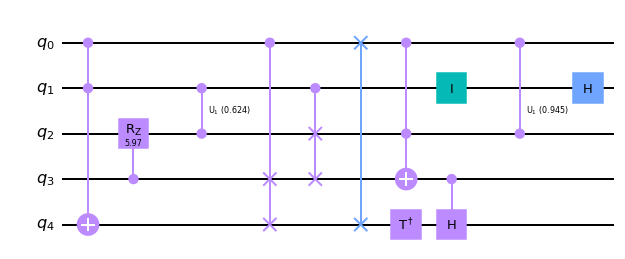

In [ ]:
circ.draw(output='mpl')